In [1]:
using Distributions 
using IntervalSets
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Random123
using HCubature
using HDF5

using KDTree
using BAT
using BATPar

using LaTeXStrings

In [2]:
import Plots

Plots.pyplot()

Plots.PyPlotBackend()

In [3]:
import PyPlot

plt = PyPlot

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);
# colors = vcat([0 0 0 0.1], plt.cm.Blues(range(0, stop=1, length=10))[3:end,:])

In [4]:
# prior = NamedTupleDist(a = [[1.0 .. 2.0 for i in 1:2]...],);
# outp = bat_read("../../MCMC_publication/Saved_samples/samples_2.hdf5")
# samples = varshape(prior).(outp);

In [5]:
g(x;) = 0.8*pdf.(Normal(-5,0.9), x)+1.2*pdf.(Normal(-1.0,0.4), x) + 0.8*pdf.(Normal(1.0,0.4), x) + 0.8*pdf.(Normal(5,0.9), x) # 2

likelihood = params -> LogDVal((log(g(params.a))))
prior = NamedTupleDist(a = -10. .. 10.);
posterior = PosteriorDensity(likelihood, prior);

samples, stats_tmp = bat_sample(posterior, (1000, 10), MetropolisHastings());

┌ Info: Trying to generate 10 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:206
┌ Info: Selected 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:317
┌ Info: Begin tuning of 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:72
┌ Info: MCMC Tuning cycle 1 finished, 10 chains, 2 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:105
┌ Info: MCMC Tuning cycle 2 finished, 10 chains, 10 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:105
┌ Info: MCMC tuning of 10 chains successful after 2 cycle(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:109


In [6]:
KDTree.evaluate_total_cost(data::Data) = KDTree.cost_f_1(data)

In [7]:
smpl = flatview(unshaped.(samples.v))
weights_LogLik = samples.logd
weights_Histogram = samples.weight;

data_kdtree = Data(smpl[:,1:5:end], weights_Histogram[1:5:end], weights_LogLik[1:5:end]);

In [8]:
cost_1 = KDTree.evaluate_total_cost(data_kdtree)
output_1 = KDTree.find_min_along_axis(data_kdtree, 1)

(-7.379466905624439:0.3082066509997271:7.722658993362189, Any[Inf, 2.4014935709703076e8, 2.3516861668798706e8, 2.2666224346708807e8, 2.1194379928347364e8, 1.9432786575652304e8, 1.730102741241772e8, 1.533761001045547e8, 1.3372833930325617e8, 1.123779621889506e8  …  1.3590903159360424e8, 1.6119383544305906e8, 1.8153360721709028e8, 1.9983968358363315e8, 2.2084539210071146e8, 2.3327784037421653e8, 2.3761195102961916e8, 2.415872064162538e8, Inf, Inf], 0.017492718369011284, 3.982748670882299e7)

In [9]:
data_kdtree_2 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .> output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .> output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .> output_1[3]]);
data_kdtree_3 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .< output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .< output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .< output_1[3]]);

In [10]:
cost_2 = KDTree.evaluate_total_cost(data_kdtree_2)
cost_3 = KDTree.evaluate_total_cost(data_kdtree_3)

output_2 = KDTree.find_min_along_axis(data_kdtree_2, 1)
output_3 = KDTree.find_min_along_axis(data_kdtree_3, 1)

(-7.379466905624439:0.15093654610108878:0.01642385332891161, Any[Inf, 2.256682849632851e7, 2.2182253073246032e7, 2.18875932954646e7, 2.135606217550765e7, 2.031533994349442e7, 1.990904286046572e7, 1.9005757001590926e7, 1.7700411005879235e7, 1.6676558339207891e7  …  4.674388037469576e6, 6.080607330338938e6, 7.884250510527784e6, 1.0721763636668788e7, 1.3837147650048869e7, 1.6463846206584321e7, 1.947405173576925e7, 2.102425001781385e7, 2.2139623800919697e7, Inf], -3.0023070686928643, 1.392778964602247e6)

In [11]:
data_kdtree_4 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .> output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .> output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .> output_3[3]]);
data_kdtree_5 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .< output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .< output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .< output_3[3]]);

In [12]:
cost_4 = KDTree.evaluate_total_cost(data_kdtree_4)
cost_5 = KDTree.evaluate_total_cost(data_kdtree_5)

output_4 = KDTree.find_min_along_axis(data_kdtree_4, 1)
output_5 = KDTree.find_min_along_axis(data_kdtree_5, 1)

(-7.379466905624439:0.08927468035729516:-3.005007568116976, Any[Inf, 906364.6235043257, 896692.7525219313, 866529.1473882725, 866529.1473882725, 839493.7502421264, 799346.5162413542, 778959.2237646477, 707686.2551817787, 678667.3301613448  …  593423.4352651626, 666687.1769308106, 691926.298280378, 761912.1128047828, 796935.1544189734, 836623.6134982622, 872790.2368661204, 903891.6524733957, 919685.2511197452, Inf], -5.058325216334765, 154880.11855988982)

In [13]:
cost_array = [cost_1, output_1[4], output_3[4]+cost_2, output_2[4]+cost_5+cost_4]
cut_range = 0:1:3

0:1:3

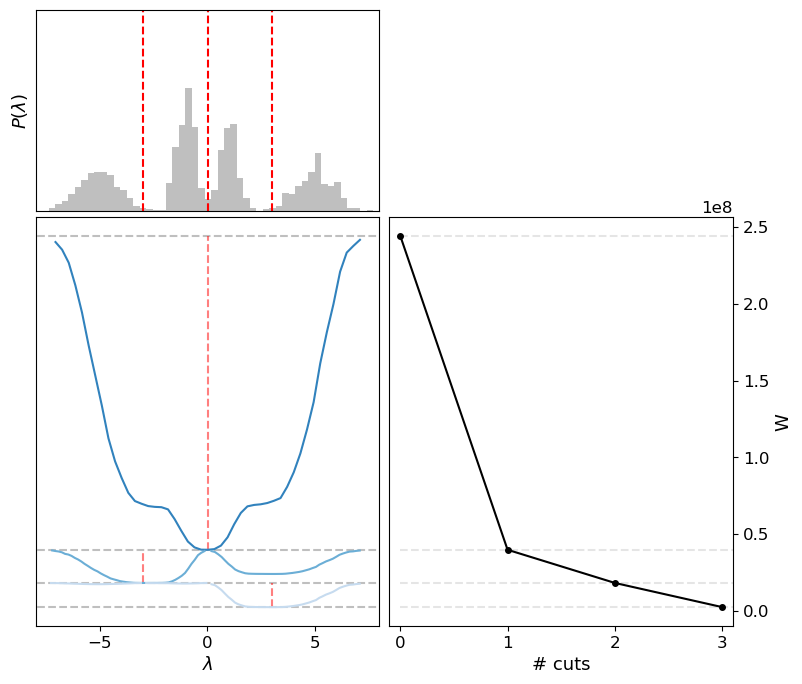

(0.0, 1300.0)

In [14]:
fig = plt.figure(figsize=(9,8),)

fig.subplots_adjust(hspace=0.03, wspace=0.03)

ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2, colspan=1, yticklabels=[],  yticks=[], )
ax2 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], )
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1,  )

ax2.hist(data_kdtree.samples[1,:], weights=data_kdtree.weights, bins=50, color="gray", alpha=0.5, label="Density");
ax2.vlines(output_1[3], 0, 1700, color="red", ls="--", label="Cut position")
ax2.vlines(output_3[3], 0, 1700, color="red", ls="--")
ax2.vlines(output_2[3], 0, 1700, color="red", ls="--")
ax2.get_xaxis().set_visible(false) 
# ax2.legend(loc="upper left", frameon=true, framealpha=0.9, ncol=1)
ax2.set_ylabel(L"P(\lambda)")

# ax1.plot(output_1[1], output_1[2], color="steelblue") #dodgerblue skyblue lightskyblue lightblue
# ax1.plot(output_2[1], cost_3 .+ output_2[2], color="lightskyblue")
# ax1.plot(output_3[1], cost_2 .+ output_3[2], color="lightskyblue")
# ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color="lightblue")
# ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color="lightblue")
# ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color="lightblue")

ax1.plot(output_1[1], output_1[2], color=PyPlot.ColorMap("tab20c").colors[1]) #dodgerblue skyblue lightskyblue lightblue
ax1.plot(output_2[1], cost_3 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_3[1], cost_2 .+ output_3[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[4])

ax1.hlines(output_3[4]+cost_2, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(output_2[4]+cost_5+cost_4, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(cost_1, -10,10, color="gray", ls="--", alpha=0.5 )
ax1.hlines(output_1[4], -10,10, color="gray", ls="--", alpha=0.5)

ax1.vlines(output_1[3], output_1[4], cost_1, color="red", alpha=0.5, ls="--")
ax1.vlines(output_3[3], output_3[4]+cost_2, output_1[4], color="red", alpha=0.5, ls="--")
ax1.vlines(output_2[3], output_2[4]+cost_5+cost_4, output_3[4]+cost_2, color="red", alpha=0.5, ls="--")
# ax2.vlines(output_3[3], 0, 700, color="red")
# ax2.vlines(output_2[3], 0, 700, color="red")

ax1.set_xlabel(L"\lambda")

ax3.plot(collect(cut_range), cost_array, color="black", "-o", ms=4, mfc="k")
ax3.yaxis.tick_right()
ax3.yaxis.set_ticks_position("right")
ax3.set_xlabel("# cuts")
ax3.set_ylabel("W")
ax3.yaxis.set_label_position("right")

ax3.hlines(output_3[4]+cost_2, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_2[4]+cost_5+cost_4, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(cost_1, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_1[4], 0,4, color="gray", ls="--", alpha=0.2)
ax3.set_xticks(collect(cut_range))
ax3.set_xlim(-0.1, 3.1)

ax2.set_xlim(-8., 8.)
ax1.set_xlim(-8., 8.)

ax2.set_ylim(0.0, 1300.)

# fig.savefig("../../MCMC_publication/fig-partition.pdf", bbox_inches = "tight")